In [ ]:
!pwd

In [1]:
import glob2 as glob
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt


paths = glob.glob('../data/fonts/*.ttf')
print(paths[:10])

['../data/fonts/MBurnette.ttf', '../data/fonts/MattsHandwriting.ttf', '../data/fonts/ANDi-Regular.ttf', '../data/fonts/Megaink.ttf', '../data/fonts/Aspargo.ttf', '../data/fonts/Higher.ttf', '../data/fonts/michellehandwritting.ttf', '../data/fonts/Sareeka-demo.ttf', '../data/fonts/stiletto skinny.vfb.ttf', '../data/fonts/123Marker.ttf']


In [3]:
#Last classified font:
index = 738
paths = paths[index:]

In [7]:
import ipywidgets as widgets
from IPython.display import display, clear_output

class Cycler:
    
    def __init__(self, paths):
        self.paths = paths
        self.handwritten = []
        self.not_handwritten = []
        self.yes_button = widgets.Button(description="Yes!")
        self.yes_button.on_click(self.on_yes_clicked)
        self.no_button = widgets.Button(description="No")
        self.no_button.on_click(self.on_no_clicked)
        self.generator = None
        self.last_font = None
    
    def font_generator(self):
        ''' This is a generator that always takes one font and 
        displays its writing style for a predetermined text.
        '''
        for idx, font_name in enumerate(self.paths):
            try:
                fnt = ImageFont.truetype(self.paths[idx], 100)
                img = Image.new('RGB', (2500, 150), color = 'white')
                d = ImageDraw.Draw(img)
                d.text((10,10), "The quick brown fox jumps over the lazy dog",
                       font=fnt, fill=(0, 0, 0))

                plt.figure(figsize = (30,3))
                plt.imshow(img)

                temp = font_name.split("/")[-1].split(".")[0]
                #img.save(f'../data/example{temp}.png')
                yield temp 

            except:
                yield "failed"
    
    def initiate_generator(self):
        self.generator = self.font_generator()
        
        print("The generator has been initiated! Click button to start.")
        
        display(self.yes_button)
        display(self.no_button)
        return None
    
    def on_yes_clicked(self, b):
        clear_output()
        
        if(self.last_font!=None):
            self.handwritten.append(self.last_font)
                
        display(self.yes_button)
        display(self.no_button)
        self.last_font = next(self.generator)
        
        print(self.last_font)
        print(cycler.handwritten)
        return None
    
    def on_no_clicked(self, b):
        clear_output()
        
        if(self.last_font!=None):
            self.not_handwritten.append(self.last_font)
        
        display(self.yes_button)
        display(self.no_button)
        self.last_font = next(self.generator)
        
        print(self.last_font)
        print(cycler.handwritten)
        return None


Button(description='Yes!', style=ButtonStyle())

Button(description='No', style=ButtonStyle())

dryoshiabibi
['You Me And Coffee', '[Catalina]', 'Inclinedletter', 'gnyrwn971', 'SnorkelWhisp', 'Girly', 'Those_Days', 'JH', 'LuxuryImport', 'vite']


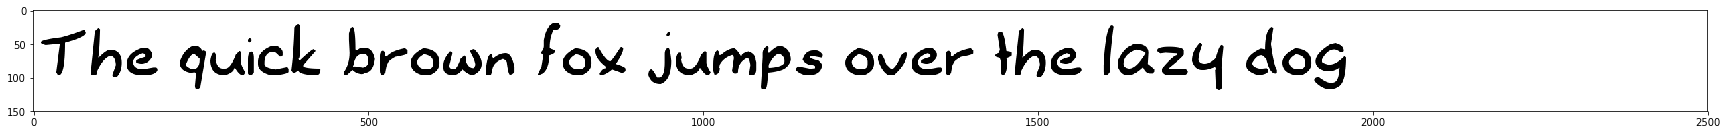

In [9]:
cycler = Cycler(paths)
cycler.initiate_generator()


In [17]:
import pickle
index_classified = len(cycler.handwritten) + len(cycler.not_handwritten) + index
pickle.dump(cycler.handwritten,open( f"../data/fonts/handwritten_{index}_to_{index_classified}.p", "wb" ))

In [11]:
def font_generator(paths=paths):
    ''' This is a generator that always takes one font and 
    displays its writing style for a predetermined text.
    '''
    for idx, font_name in enumerate(paths):

        temp = font_name.split("/")[-1].split(".")[0]
        yield temp 

In [12]:
something = list(font_generator(paths))

In [13]:
print(something.index('You Me And Coffee'))
print(len(cycler.handwritten))

0
10
